# Binary phase diffractive lens

Here we analyze how to determine the field produced by a phase binary diffractive lens.


Loading modules

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

import matplotlib.cm as cm

In [2]:
from matplotlib import rcParams
rcParams['figure.dpi']=250

Simulation data

In [3]:
x0 = np.linspace(-200*um, 200*um, 2048)
z0 = np.linspace(0 * um, 50*um, 512)
wavelength = .55 * um

Light source

In [4]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=1*mm, theta=0. * degrees)

Definition of binary diffractive lens in x plane

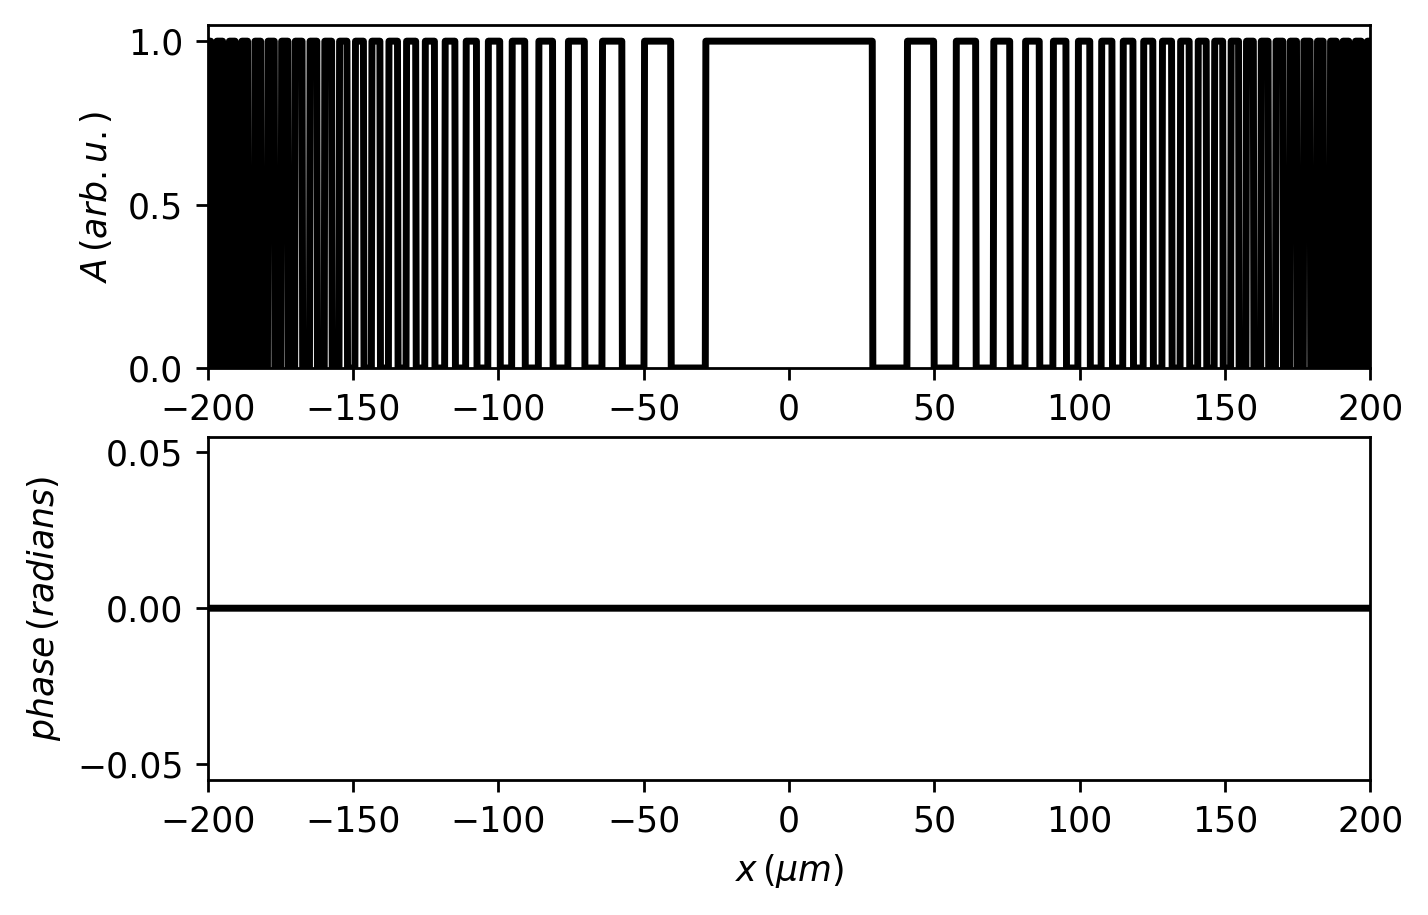

In [5]:
size_lens=2*mm
t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.fresnel_lens(x0=0.0*um, focal=1.5*mm, kind='amplitude', phase=np.pi, mask=True, radius=size_lens)
t0.draw(kind='field')

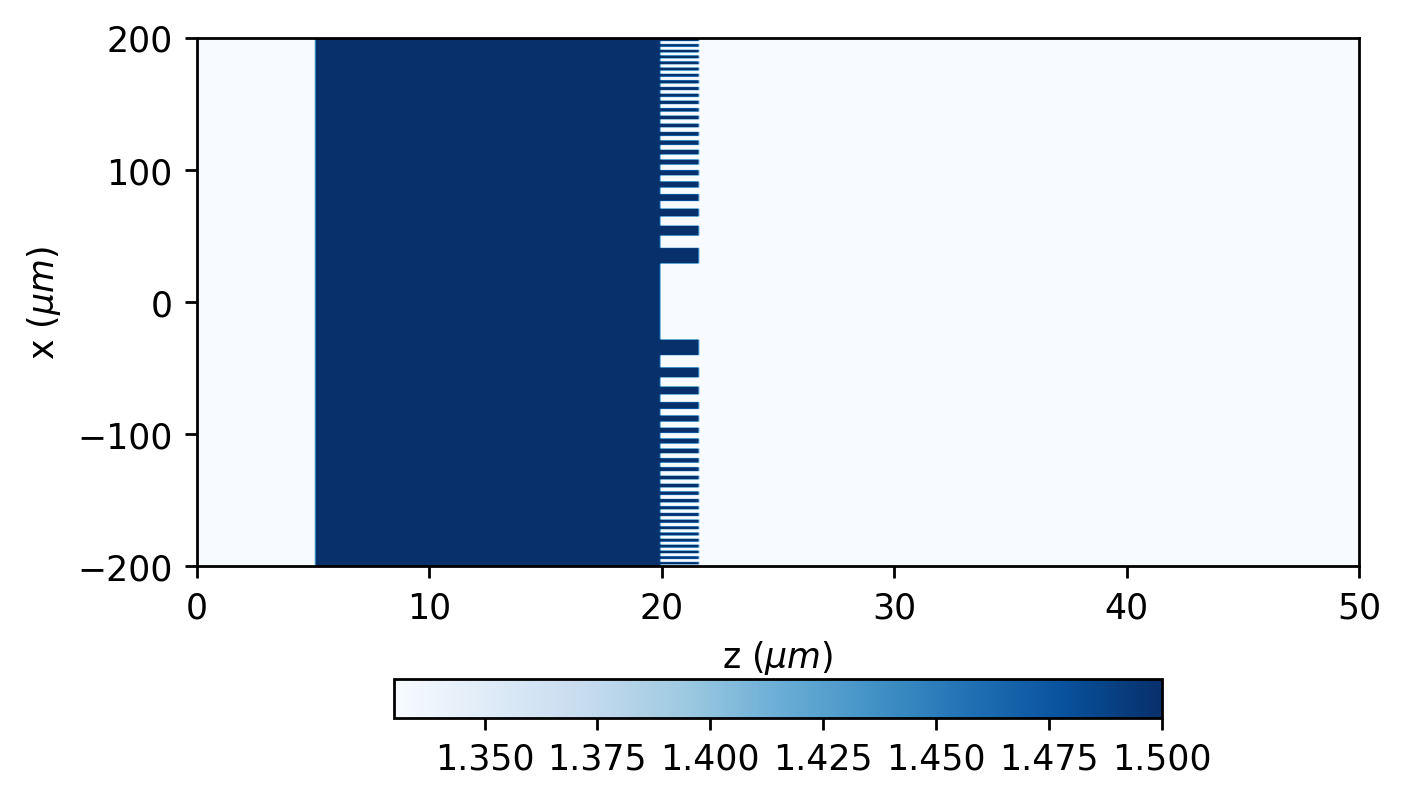

In [6]:
n_lens=1.5
n_background=1.33
k=2*np.pi/wavelength
desfase=np.pi
height_lens=desfase/(k*(n_lens-n_background))
height_rectangle=15*um
z_ini=5*um

DOE = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=n_background)
DOE.rectangle(r0=(0,z_ini+height_rectangle/2), angle=(0,(0,0)),
                           refraction_index=n_lens, size=(size_lens, height_rectangle))
DOE.extrude_mask(t=t0, z0=z_ini+height_rectangle, z1=z_ini+height_rectangle+height_lens, refraction_index=n_lens)
DOE.draw_refraction_index(draw_borders=False,  colorbar_kind='horizontal')

DOE.incident_field(u0)


## Near field

Once we have defined the structure XZ of the diffractive lens, now let us see the optical field around the DOE. We use BPM to determine the field inside the mask and also after it.

In [7]:
DOE.clear_field()
DOE.BPM(verbose=False)

Now, we show the intensity distribution of the field in the mask. We use the same parameters, but whe change the simulation distance z.

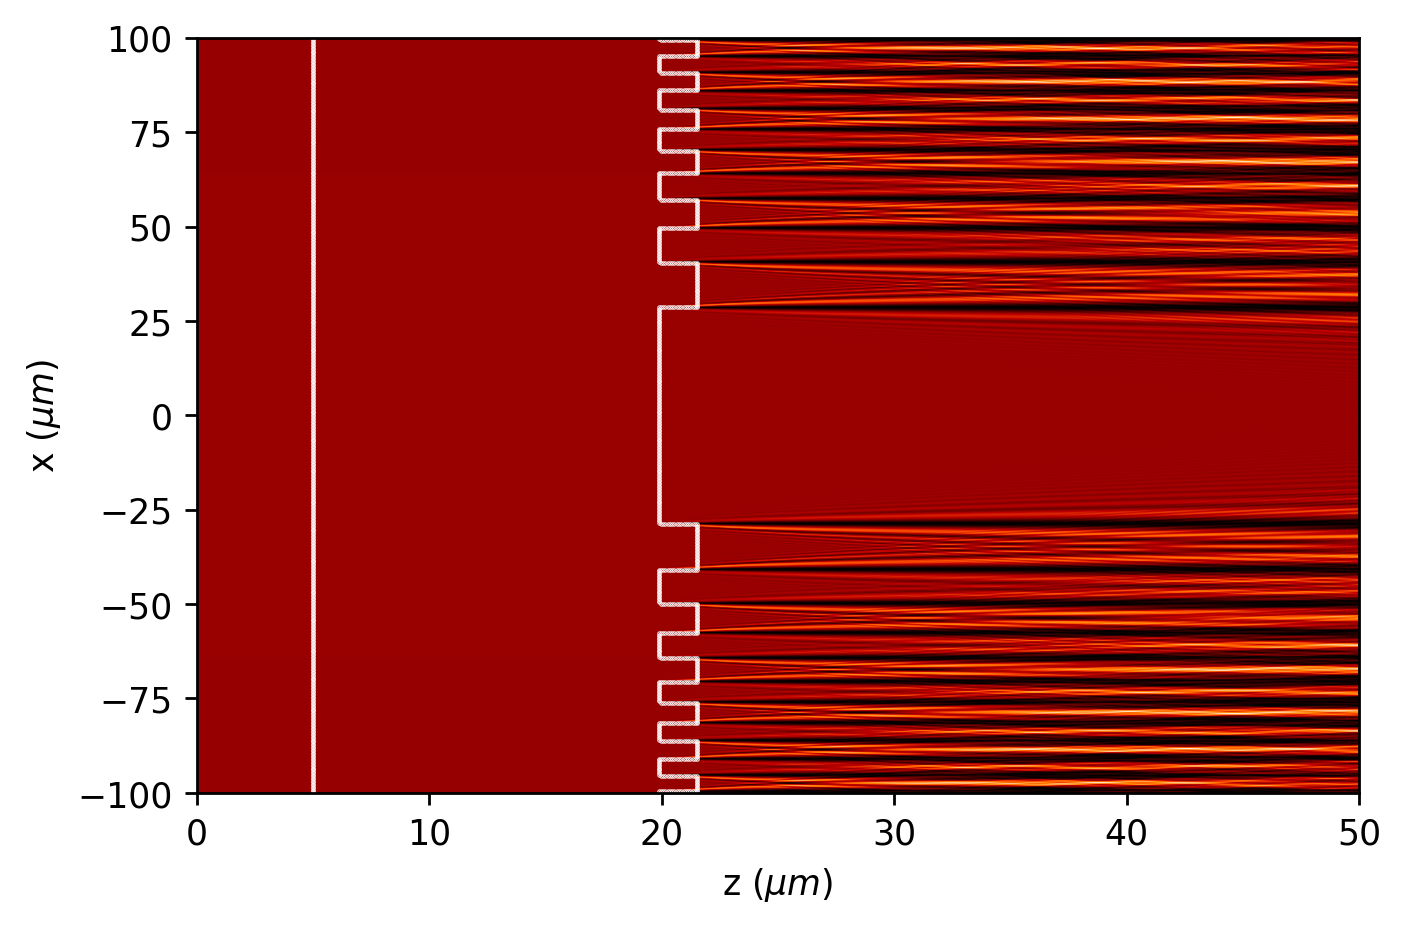

In [8]:
DOE.draw(kind='intensity',logarithm=True, normalize='maximum', draw_borders=True)
plt.ylim(-100,100);

We see that at the edges of the binary lens, a shadow is produced.

Also, we can see the phase distribution after the lens.

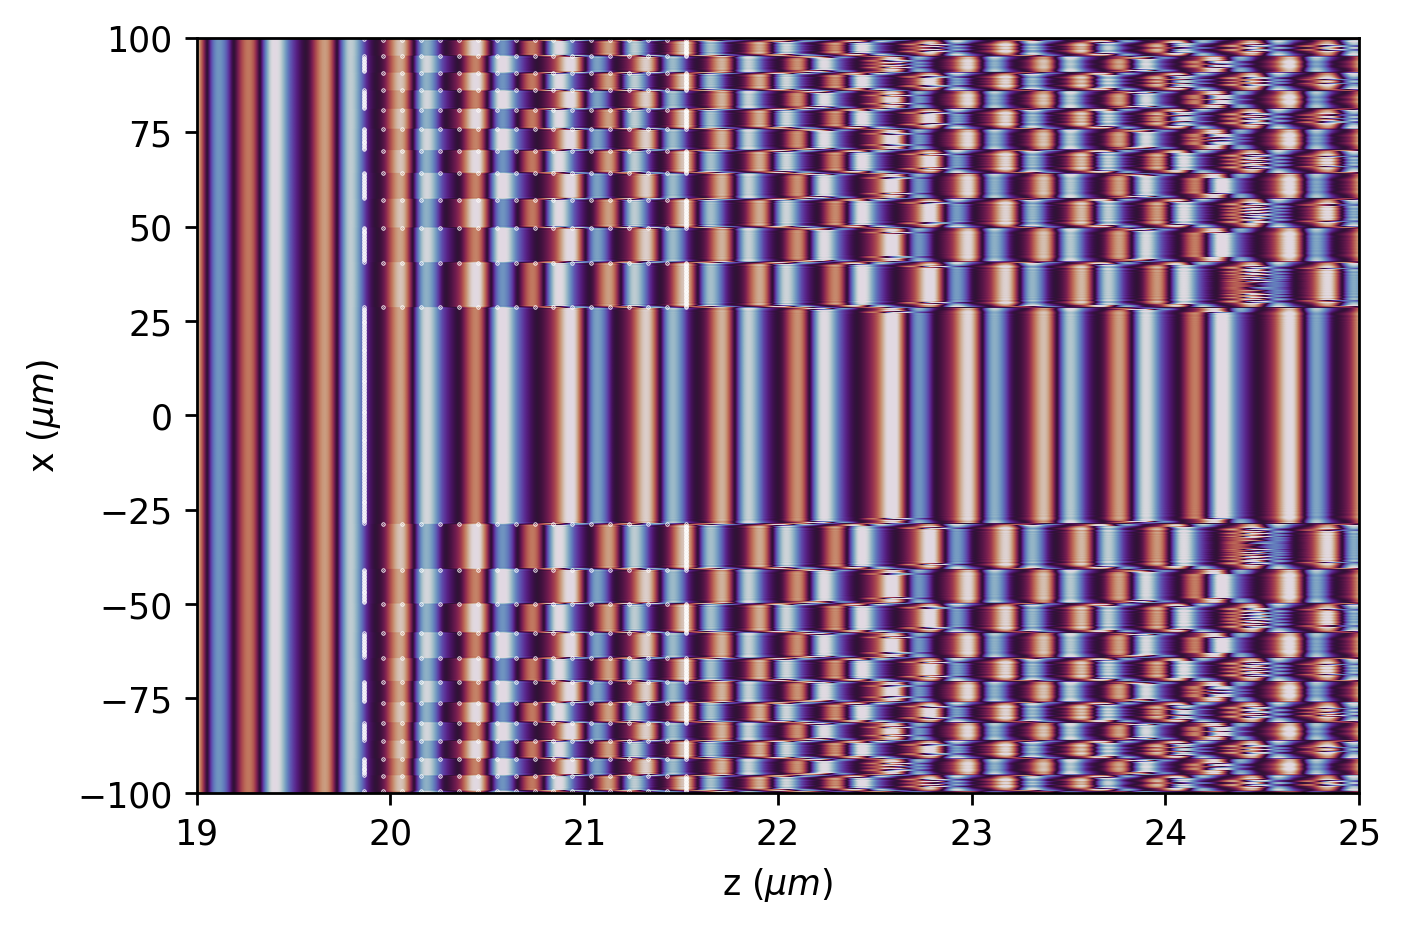

In [9]:
DOE.draw(kind='phase', draw_borders=True)
plt.xlim(19,25)
plt.ylim(-100,100);

we can see that the wavefront is divided in two parts, depending on the top or valley of the grating. A phase shift is produced.


## Far field

At the focal distance of the grating, focusing of the light beam is produced. We propagate again with BPM technique, up to the focal distance.

In [10]:
x0_far = np.linspace(-2*mm, 2*mm, 1024*8)
z0_far = np.linspace(0 * um, 25*mm, 1024*4)
wavelength = .55 * um 

In [11]:
u0 = Scalar_source_X(x=x0_far, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=1*mm, theta=0. * degrees)
t0 = Scalar_mask_X(x=x0_far, wavelength=wavelength)

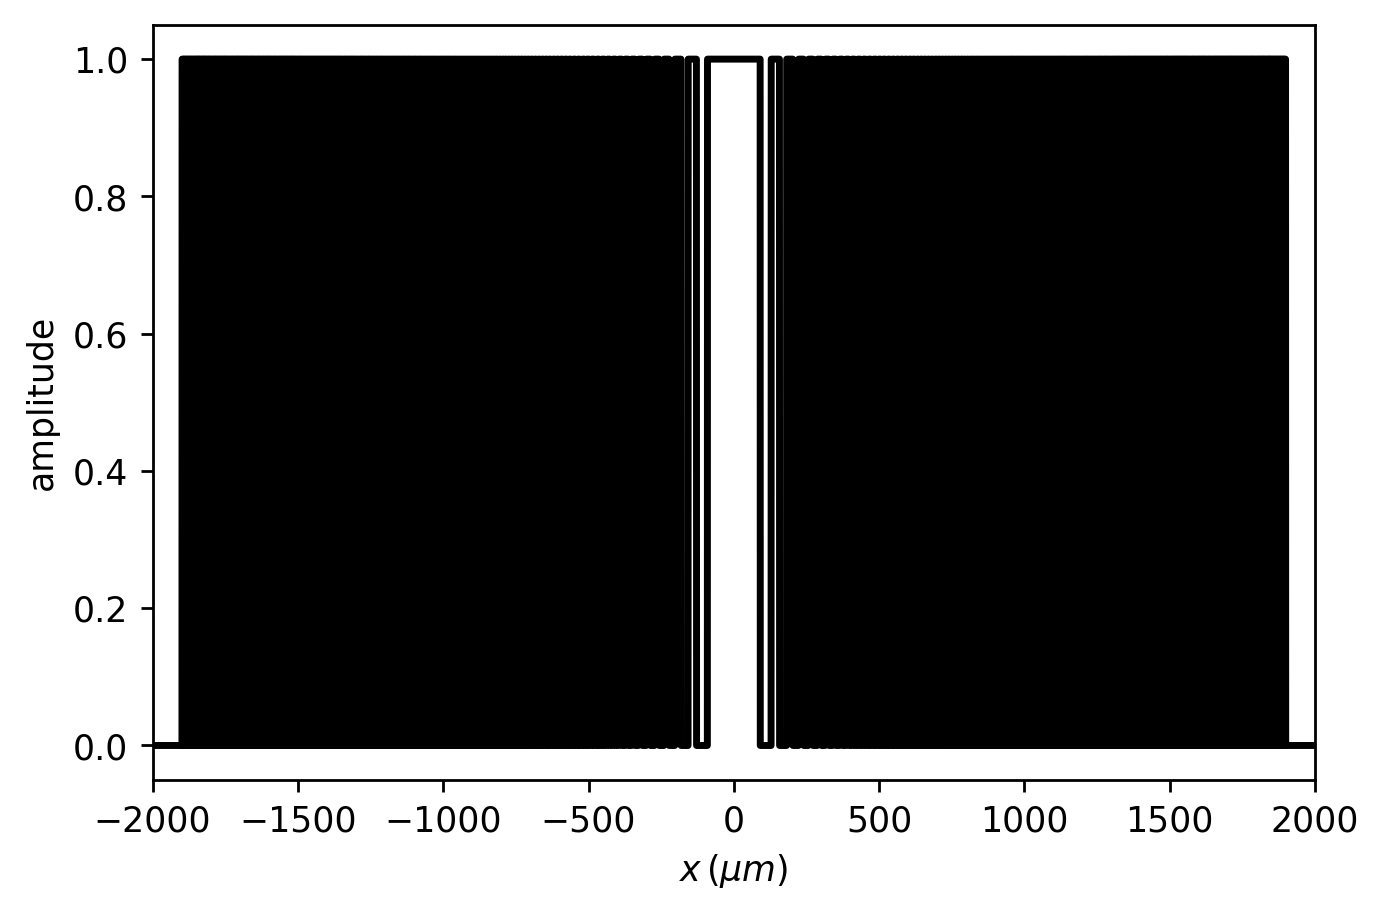

In [12]:
size_lens=3.8*mm
t0.fresnel_lens(x0=0.0*um, focal=15*mm, kind='amplitude', phase=np.pi, mask=True, radius=size_lens/2)
t0.draw(kind='amplitude');

In [13]:
n_lens = 1.5
n_background = 1.33
k = 2 * np.pi / wavelength
desfase = np.pi
height_lens = abs(desfase / (k * (n_lens - n_background)))
z_ini = 1 * mm

DOE_far = Scalar_mask_XZ(
    x=x0_far, z=z0_far, wavelength=wavelength, n_background=n_background)
DOE_far.incident_field(u0*t0)

In [14]:
DOE_far.WPM(verbose=False)

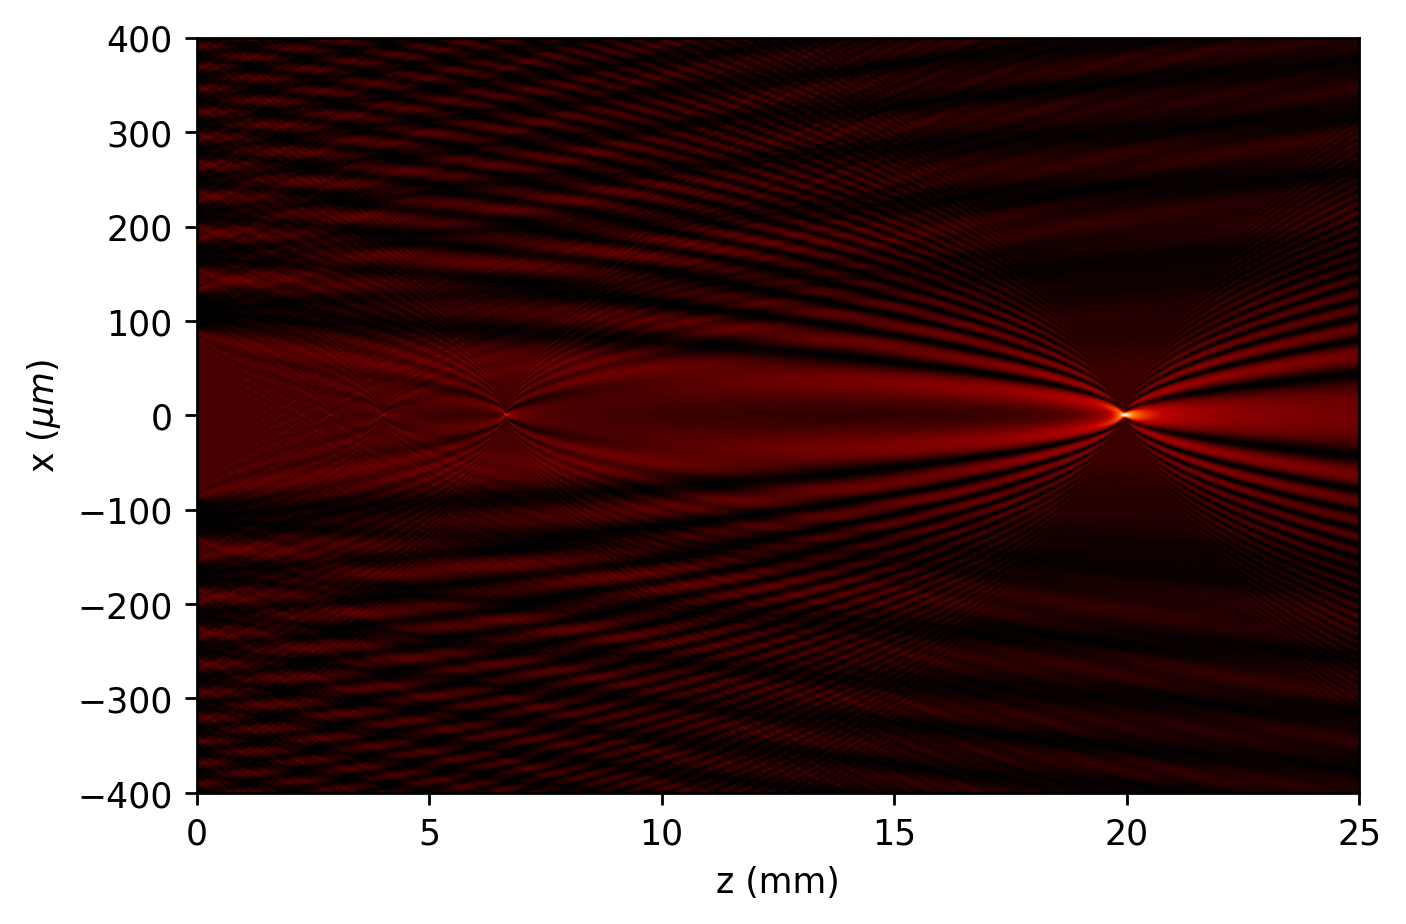

In [15]:
DOE_far.draw(logarithm=True, draw_borders=True, z_scale='mm')
plt.ylim(-400*um,400*um);

In [16]:
x_f,z_f = DOE_far.search_focus()

x = 0.244 um, z = 19932.845 um


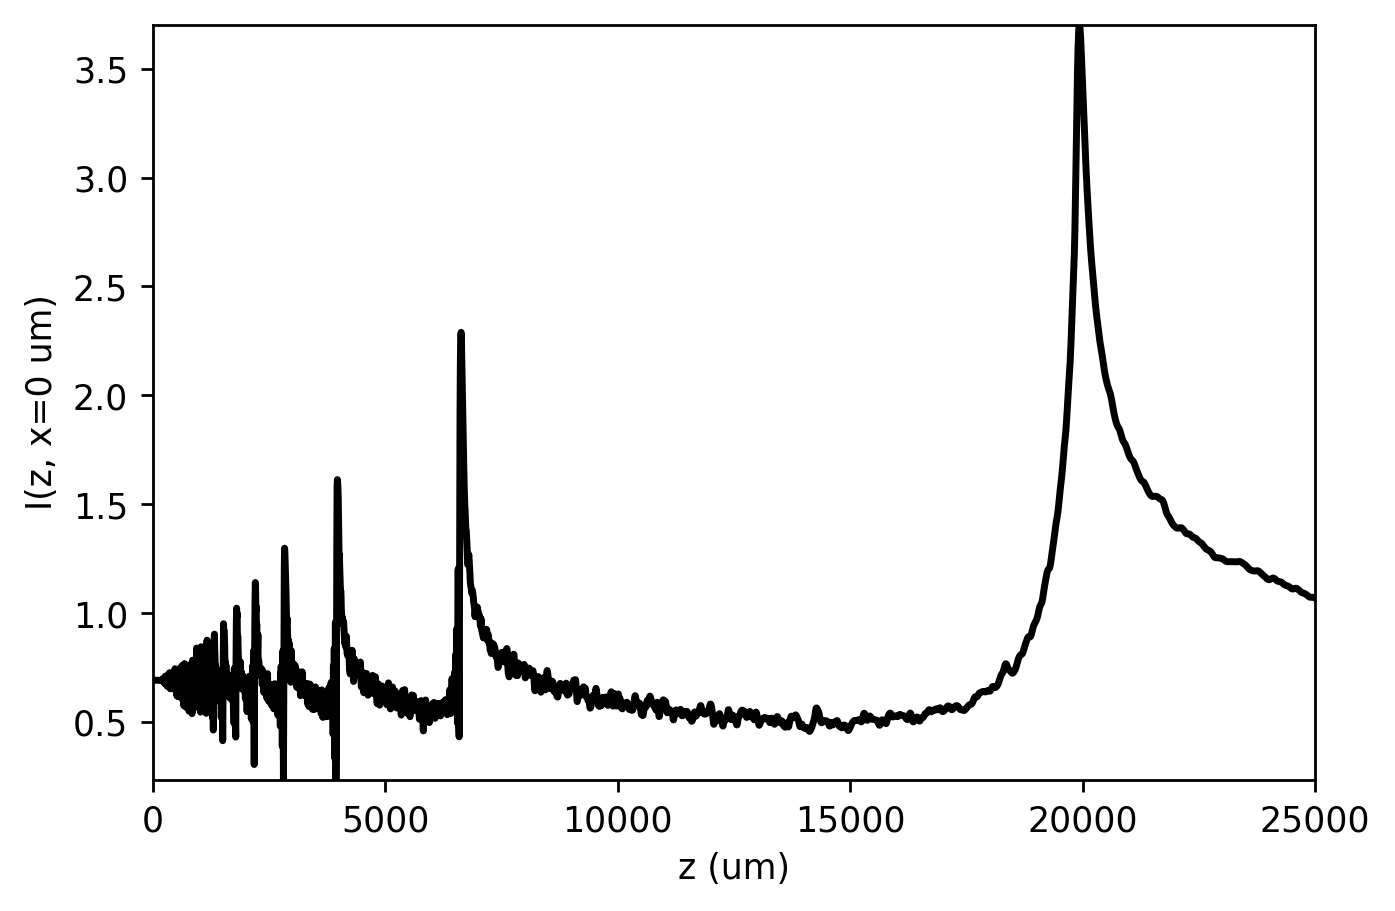

In [17]:
DOE_far.profile_longitudinal(kind='intensity', logarithm=True, x0=0);

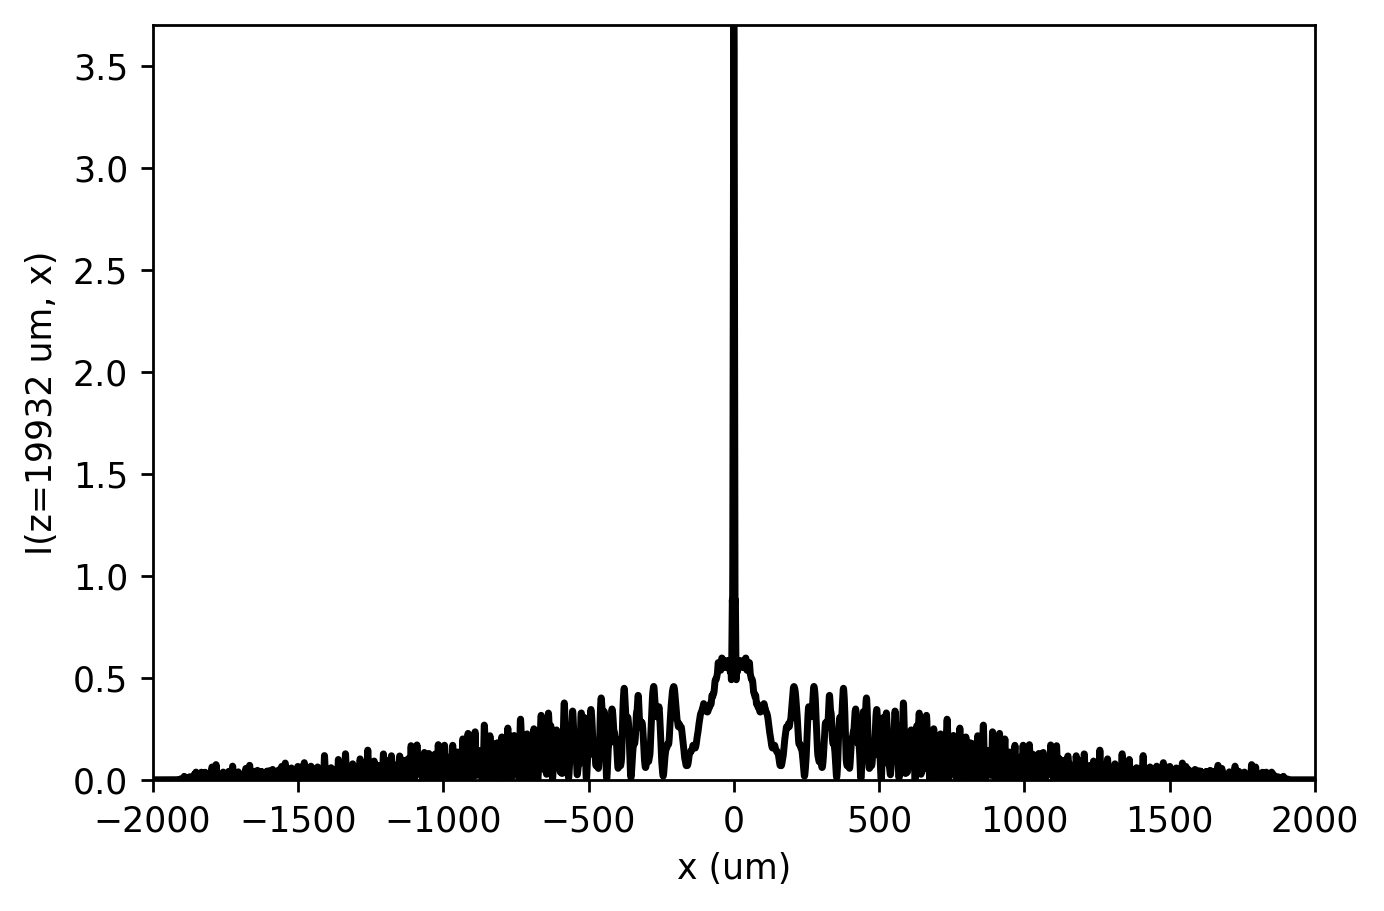

In [18]:
DOE_far.profile_transversal(kind='intensity', logarithm=True, z0=z_f);

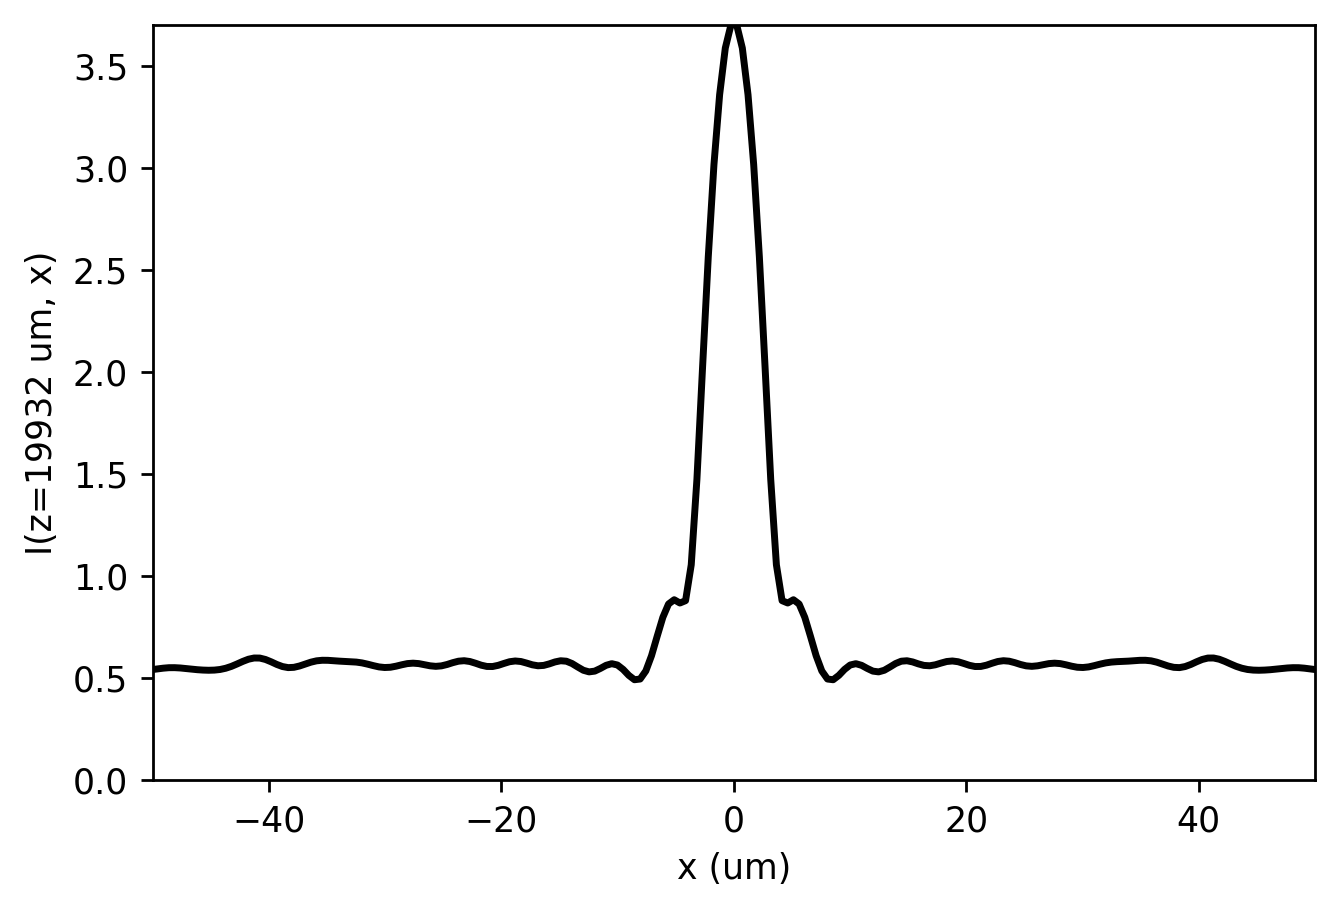

In [19]:
DOE_far.profile_transversal(kind='intensity', logarithm=True, z0=z_f);
plt.xlim(-50*um,50*um);